In [1]:
import pandas as pd

***

# Rapprocher les exports


> _Premièrement, j’ai besoin que tu rapproches deux exports : un export de l’ERP contenant les références produit, leur prix de vente et leur état de stock, et un export d’une table de l’outil de CMS contenant les informations des produits commercialisés en ligne (nom, description, nombre de ventes...).
L’export issu de la boutique en ligne contient le nombre de ventes pour chaque produit depuis sa mise en ligne, il ne permet pas d’analyser l'évolution des ventes dans le temps.
Je vais t’envoyer un mail dès la fin de notre entretien avec ces 2 exports en pièce jointe.
En plus de ces 2 exports, tu vas bénéficier d’une aide précieuse car Sylvie, notre ancienne stagiaire, a réalisé un travail de fourmi. Elle a créé un tableau Excel qui permet d’établir le lien entre la référence du produit dans l’ERP (product_id) et la référence du même produit dans la base de la boutique en ligne (SKU)._

Nous allons:
- importer les fichiers excel dans des dataframes;
- vérifier et éventuellement nettoyer le contenu de ces dataframes;
- rassembler les dataframes

#### Le fichier "Erp"

In [2]:
# Lire les fichiers concernés
filepath='/Users/oliviavolpi/MOOC/OpenClassroom-DataAnalyst/OpenClassroom- Projet 5/erp.xlsx'
erp = pd.read_excel(filepath)
erp.sample(5)

,product_id,onsale_web,price,stock_quantity,stock_status
699,6128,1,10.6,50,instock
131,4209,0,73.5,0,outofstock
159,4246,1,15.3,25,instock
106,4179,1,24.0,73,instock
778,6904,0,31.0,22,instock


In [3]:
erp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      825 non-null    int64  
 1   onsale_web      825 non-null    int64  
 2   price           825 non-null    float64
 3   stock_quantity  825 non-null    int64  
 4   stock_status    825 non-null    object 
dtypes: float64(1), int64(3), object(1)
memory usage: 32.4+ KB


Il n'y a pas de données manquantes, et les types de data ("dtype") correspondent à l'usage prévu. 

In [4]:
# L'examen d'un "sample" a montré une anomalie dans la colonne stock_status:
# on vérifie l'ensemble de la colonne
erp.query('(stock_quantity ==0) & (stock_status == "instock")')

,product_id,onsale_web,price,stock_quantity,stock_status
443,4954,1,25.0,0,instock


On a constaté qu'une ligne est en erreur dans le fichier: la __quantité en stock est zéro, mais le statut indique que le produit est disponible__. 

En attendant une __vérification du stock__, on va corriger le statut incorrect de ce produit.

In [5]:
print('Avant modification:',erp.loc[443,'stock_status'])
erp.loc[443,'stock_status'] = 'outofstock'
print('Après modification:',erp.loc[443,'stock_status'])

Avant modification: instock
Après modification: outofstock


On pourrait, en fait, __renoncer complètement à la colonne stock_status__, qui ne donne pas d'information supplémentaire: la colonne stock_quantity est suffisante. 

In [6]:
# Suppression de la colonne et vérification du résultat
erp.drop(columns='stock_status',inplace = True)
erp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      825 non-null    int64  
 1   onsale_web      825 non-null    int64  
 2   price           825 non-null    float64
 3   stock_quantity  825 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 25.9 KB


***

#### Le fichier "Web"

In [7]:
filepath='/Users/oliviavolpi/MOOC/OpenClassroom-DataAnalyst/OpenClassroom- Projet 5/web.xlsx'
web = pd.read_excel(filepath)
web.head()

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [8]:
web.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   sku                    1428 non-null   object        
 1   virtual                1513 non-null   int64         
 2   downloadable           1513 non-null   int64         
 3   rating_count           1513 non-null   int64         
 4   average_rating         1430 non-null   float64       
 5   total_sales            1430 non-null   float64       
 6   tax_status             716 non-null    object        
 7   tax_class              0 non-null      float64       
 8   post_author            1430 non-null   float64       
 9   post_date              1430 non-null   datetime64[ns]
 10  post_date_gmt          1430 non-null   datetime64[ns]
 11  post_content           0 non-null      float64       
 12  post_title             1430 non-null   object        
 13  pos

Il y a 28 colonnes, dont beaucoup en rapport avec les posts. Il n'est sans doute __pas nécessaire de toutes les garder__: il faut identifier celles qui sont les plus pertinentes, notamment celles qui pourraient indiquer la __date de mise en vente__. 

On examine tout d'abord chaque colonne pour vérifier que le __contenu est informatif__. On utilise:
- info(), qui permet d'identifier immédiatement les colonnes entièrement NULL ('O non-null') ou celles ppur lesquelles il manque beaucoup d'information;
- unique(), appliqué à chaque colonne, pour voir les différentes valeurs de la colonne;
- nunique(), appliqué à chaque colonne, pour connaître le nombre de  valeurs différentes de la colonne.


Colonnes vides, NULL:
- virtual : uniquement des zéros
- downloadable: uniquement des zéros
- rating_count: uniquement des zéros
- average_rating : des zéros et des NaN
- tax_class : entièrement NULL
- post_content: entièrement NULL
- post_password: entièrement NULL
- post_content_filtered: entièrement NULL
- post_parent : des zéros et des NaN
- menu_order : des zéros et des NaN
- comment_count : des zéros et des NaN



Ensuite, en tenant compte des questions posées, on évalue la __pertinence__ de la colonne

Colonnes dont le contenu ne paraît pas pertinent pour la question:
- tax_status
- post_author
- post_date_gmt (redondance avec post_date)
- post_excerpt
- post_status
- comment_status
- ping_status
- post_name (redondance avec post_title
- post_modified (redondance avec post_date)
- post_modified_gmt (redondance avec post_date)
- guid
- post_type
- post_mime_type



Voici, après ces vérifications, les __colonnes à conserver:__
- sku
- total_sales
- post_date
- post_title (pour avoir le nom du vin, plutôt qu'un numéro de produit)


In [9]:
#filepath='/Users/oliviavolpi/MOOC/OpenClassroom-DataAnalyst/OpenClassroom- Projet 5/web.xlsx'
#cols=['sku','total_sales','post_date','post_title']
#test = pd.read_excel(filepath, usecols=cols)
#test.sample(15)
cols=['sku','total_sales','post_date','post_title']
web=web.filter(items=cols)

In [10]:
web.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   sku          1428 non-null   object        
 1   total_sales  1430 non-null   float64       
 2   post_date    1430 non-null   datetime64[ns]
 3   post_title   1430 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 47.4+ KB


Le fichier de la boutique web présente __plus de 1500 entrées__, ce qui est étonnant car, dans le fichier de liaison réalisé par "Sylvie", il y a __seulement 714 références__. On vérifie ce qu'il en est. 

In [11]:
# Vérification des sku
web.sku.nunique()

714

Il y a probablement un problème avec les sku: il n'y en a que 714 différents, comme dans le fichier de liaison réalisé par "Sylvie". A quoi correspondent les lignes en plus? 

In [12]:
web.sku.value_counts()

14332    2
15032    2
15717    2
14692    2
15715    2
        ..
16042    2
16041    2
16039    2
16038    2
15360    2
Name: sku, Length: 714, dtype: int64

In [13]:
# Vérification d'un échantillon de lignes
print(web.query('sku == 14332'))
print(web.query('sku == 15360'))
print(web.query('sku == 14692'))
print(web.query('sku == 16041'))

       sku  total_sales           post_date  \
97   14332          1.0 2018-02-14 16:45:18   
895  14332          1.0 2018-02-14 16:45:18   

                                    post_title  
97   Le Hameau Des Ollieux Monsieur Pinot 2017  
895  Le Hameau Des Ollieux Monsieur Pinot 2017  
        sku  total_sales           post_date  \
557   15360          2.0 2019-01-31 13:42:46   
1330  15360          2.0 2019-01-31 13:42:46   

                                    post_title  
557   Domaine Huet Vouvray Pétillant Brut 2014  
1330  Domaine Huet Vouvray Pétillant Brut 2014  
        sku  total_sales           post_date  \
589   14692          0.0 2019-03-19 10:06:47   
1362  14692          0.0 2019-03-19 10:06:47   

                                         post_title  
589   Château Fonréaud Bordeaux Blanc Le Cygne 2016  
1362  Château Fonréaud Bordeaux Blanc Le Cygne 2016  
       sku  total_sales           post_date                       post_title
10   16041         14.0 2018-02-12 

On constate que __chaque sku apparait deux fois__. 

In [14]:
# Elimination des doublons
web.drop_duplicates(inplace= True,ignore_index = True)

In [15]:
# Vérification du résultat
web.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   sku          714 non-null    object        
 1   total_sales  716 non-null    float64       
 2   post_date    716 non-null    datetime64[ns]
 3   post_title   716 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 22.5+ KB


Maintenant que __les doublons ont été eliminés__, on constate un autre problème: il y a bien 714 sku, mais 717 lignes au total. On vérifie ce à quoi correspondent les __lignes qui contiennent des valeurs null__. 

In [16]:
avec_valeurs_null = web[web.isna().any(axis=1)]
avec_valeurs_null

,sku,total_sales,post_date,post_title
178,NaN,NaN,NaT,NaN
449,NaN,0.0,2018-07-31 12:07:23,Pierre Jean Villa Côte Rôtie Fongeant 2017
450,NaN,0.0,2018-08-08 11:23:43,Pierre Jean Villa Condrieu Jardin Suspendu 2018


On décide qu'on peut sans crainte éliminer la ligne 178, dont toutes les valeurs sont null. 

En revanche, même s'il n'y a pas encore eu de vente pour les lignes 449 (_Pierre Jean Villa Côte Rôtie Fongeant 2017_) et 450 (_Pierre Jean Villa Condrieu Jardin Suspendu 2018_), ces produits ont fait l'objet d'une mise en vente sur la boutique en ligne. 

On les laisse pour le moment, mais il conviendra de leur attribuer rapidement un sku, correspondant à leur product_id. Il s'agit __peut-être des produits pour lesquels Sylvie n'a pas réussi à trouver de correspondance__. 

In [17]:
#on élimine uniquement la ligne dont toutes les valeurs sont null
web.dropna(axis=0,how='all',inplace = True)
web.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 716 entries, 0 to 716
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   sku          714 non-null    object        
 1   total_sales  716 non-null    float64       
 2   post_date    716 non-null    datetime64[ns]
 3   post_title   716 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 28.0+ KB


***

#### Le fichier "Lien"

 "Sylvie" a indiqué dans son "mail":
 >_je me rends compte à l’instant que j’ai également mal nommé la colonne dans le fichier Excel. En fait, la colonne id_web dans mon fichier correspond au SKU des produits dans la boutique en ligne._
 
 On renomme immediatement la colonne indiquée. 

In [18]:
filepath='/Users/oliviavolpi/MOOC/OpenClassroom-DataAnalyst/OpenClassroom- Projet 5/liaison.xlsx'
# On renomme directement la colonne "id_web" en "sku"
names= ['product_id','sku']
lien = pd.read_excel(filepath, header =0,names=names)
lien.head()

,product_id,sku
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815


In [19]:
lien.columns

Index(['product_id', 'sku'], dtype='object')

In [20]:
lien.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  825 non-null    int64 
 1   sku         734 non-null    object
dtypes: int64(1), object(1)
memory usage: 13.0+ KB


Avant de réunir les dataframes, on vérifie que les __liens correspondent aux products_id et sku__ des dataframes concernés. 

In [21]:
# On vérifie la correspondance des product_id
lien.query('product_id not in @erp.product_id')

,product_id,sku


In [22]:
# On vérifie la correspondance des sku
lien.query('sku not in @web.sku')

,product_id,sku
193,4289,13771
236,4568,15065
241,4584,14785
355,4741,12601
391,4864,15154
394,4869,14360
424,4921,15608
425,4922,15586
470,5018,15272
473,5021,15630


Les product_id des dataframe "lien" et "erp" correspondent. 

En revanche, le dataframe "lien" __compte 20 sku de plus__ que le dataframe "web": 734 pour l'un, 714 pour l'autre. Cela signifie que nous n'aurons pas d'information sur la date et le nombre de vente de ces produits. D'ailleurs, sont-ils censés être en vente dans la boutique en ligne?

In [23]:
df= lien.query('sku not in @web.sku')
erp.query('product_id in @df.product_id')

,product_id,onsale_web,price,stock_quantity
193,4289,0,22.8,0
236,4568,0,21.5,0
241,4584,0,32.3,0
355,4741,0,12.4,0
391,4864,0,8.3,0
394,4869,0,17.2,0
424,4921,0,13.8,0
425,4922,0,21.5,0
470,5018,0,15.4,0
473,5021,0,17.1,0


Les vingt vins dont les product_id sont appariés aux 20 sku manquants __ne sont pas enregistrés comme étant en vente__ dans la boutique en ligne. 

Il s'agit peut-être de ce dont "Sylvie" parlait dans son mail:

>_La liste des product_id est exhaustive, mais pour les références côté Web, j’en suis moins sûre... J’ai peiné à rapprocher certaines références.

### problème avec le merge 'inner'

D'après la syntaxe, un 'inner' merge ne conserve que les enregistrements qui ont tout les deux la clef de jonction en commun. 

Or, toutes les tentatives pour réunir 'lien' et 'web', qui ont normalement 714 clefs 'sku' en commun, se traduisent par un dataframe de 896 lignes. Les tentatives en tous sens ('left', right'), ne changent pas le résultat...

In [24]:
#nombre de sku dans web
print('nombre de sku dans web:',web.sku.nunique())

#nombre de sku dans lien
print('nombre de sku dans lien:',lien.sku.nunique())

# verification clefs en commun
clefs_communes = lien.query('sku in @web.sku')

print('nb de clefs communes:',clefs_communes.sku.nunique())

nombre de sku dans web: 714
nombre de sku dans lien: 734
nb de clefs communes: 714


In [25]:
lien.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  825 non-null    int64 
 1   sku         734 non-null    object
dtypes: int64(1), object(1)
memory usage: 13.0+ KB


### remarque concernant query

dans ce cas, query semble avoir considéré que les product_id qui n'ont pas de sku correspondent quand même au sku de web

In [26]:
len(lien.query('sku in @web.sku'))

805

### Réunion des dataframes

Pour réunir les dataframes en 1 seul, on va utiliser un double merge. 

On aura ainsi un seul dataframe, contenant tous les vins en vente la boutique web et enregistrés dans l'ERP , avec leur id (erp et sku), leur date de mise en vente, la quantité vendue,  et la disponibilité.

Compte-tenu de ce qu'on vient de voir, on s'attend à avoir 714 enregistrements, correspondants aux sku corrects et correctement appariés aux product_id. 

In [27]:
# on utilise in double merge:
# d'abord les enregistrements communs de "web" et de "lien", pour éliminer les 20 sku en trop;
# ensuite 
ventes=web.merge(lien,how='inner',on='sku').merge(erp, how='inner',on='product_id')
ventes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 896 entries, 0 to 895
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   sku             714 non-null    object        
 1   total_sales     896 non-null    float64       
 2   post_date       896 non-null    datetime64[ns]
 3   post_title      896 non-null    object        
 4   product_id      896 non-null    int64         
 5   onsale_web      896 non-null    int64         
 6   price           896 non-null    float64       
 7   stock_quantity  896 non-null    int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(2)
memory usage: 63.0+ KB


In [28]:
# Suppression des lignes pour lesquelles sku est null
ventes.dropna(inplace = True)

# Chiffre d'affaire

> _Deuxièmement, une fois le rapprochement effectué, je souhaiterais avoir le chiffre d’affaires par produit, ainsi que le total du chiffre d’affaires réalisé en ligne._

Avec le dataframe créé à l'étape précédente, qui réunit les données des fichiers fournis, nous pouvons:
- obtenir le chiffre d'affaire pour chaque produit;
- obtenir le chiffre d'affaire global

###  Chiffre d'affaire par produit

Prix du produit multiplié par nb de ventes

In [29]:
ventes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 895
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   sku             714 non-null    object        
 1   total_sales     714 non-null    float64       
 2   post_date       714 non-null    datetime64[ns]
 3   post_title      714 non-null    object        
 4   product_id      714 non-null    int64         
 5   onsale_web      714 non-null    int64         
 6   price           714 non-null    float64       
 7   stock_quantity  714 non-null    int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(2)
memory usage: 50.2+ KB


In [30]:
ventes=ventes.assign(CA_produit = ventes.total_sales * ventes.price)

# On sélectionne les vins ayant en effet produit un chiffre d'affaire, et on les trie par ordre décroissant
(ventes
 .query('CA_produit > 0')
 .sort_values(by='CA_produit', ascending = False) 
 )

,sku,total_sales,post_date,post_title,product_id,onsale_web,price,stock_quantity,CA_produit
195,7818,96.0,2018-03-01 14:02:44,Champagne Gosset Grand Blanc de Blancs,4334,1,49.0,0,4704.0
72,1662,87.0,2018-02-13 13:17:25,Champagne Gosset Grand Rosé,4144,1,49.0,11,4263.0
219,3510,13.0,2018-03-22 11:21:05,Cognac Frapin VIP XO,4402,1,176.0,8,2288.0
71,11641,30.0,2018-02-13 13:08:44,Champagne Gosset Grand Millésime 2006,4142,1,53.0,8,1590.0
70,304,40.0,2018-02-13 12:57:44,Champagne Gosset Grande Réserve,4141,1,39.0,1,1560.0
...,...,...,...,...,...,...,...,...,...
153,16097,1.0,2018-02-20 10:32:11,Parcé Frères IGP Pays d'Oc Zoé Viognier 2019,4245,1,8.9,141,8.9
150,14725,1.0,2018-02-20 10:07:09,Parcé Frères IGP Côtes Catalanes Hommage à Fer...,4241,1,8.9,7,8.9
97,14332,1.0,2018-02-14 16:45:18,Le Hameau Des Ollieux Monsieur Pinot 2017,4171,1,7.8,65,7.8
441,13531,1.0,2018-07-27 10:21:50,Domaine de Montgilet Anjou Rouge 2016,5056,1,7.5,9,7.5


### Chiffre d'affaire total

Prix total des produits multiplié par nb de ventes

In [31]:
CA_total = ventes.CA_produit.sum()
print ('Le chiffre d\'affaire total est de'
       ,int(CA_total)
       ,' €, pour un total de '
       ,int(ventes.total_sales.sum())
       ,'ventes.')

Le chiffre d'affaire total est de 70568  €, pour un total de  2865 ventes.


# Valeurs aberrantes dans les prix?

>_Troisièmement et pour finir, je me demande s’il n’y a pas eu des erreurs de saisie dans certains prix des produits. J'aimerais que tu effectues une analyse sur cette variable afin de détecter d’éventuelles valeurs aberrantes, de les lister et d’en faire une représentation graphique pour plus de lisibilité._

Avant tout, on vérifie que le type de données de la variable "price" est constant et cohérent. 

In [32]:
erp.price.dtype

dtype('float64')

On observe la distribution de la variable "price". 

In [33]:
erp.price.describe()

count    825.000000
mean      32.415636
std       26.795849
min        5.200000
25%       14.600000
50%       24.400000
75%       42.000000
max      225.000000
Name: price, dtype: float64

A première vue, il n'y a pas vraiment de valeurs aberrantes dans les prix. 

Mettre en lien avec les ventes?

In [34]:
erp.price.nunique()

381

In [35]:
std = erp.price.std()
moyenne = erp.price.mean()
prix_extremes =erp.query('price > (@moyenne + 3*@std)')
id_prix_extremes= prix_extremes.product_id
df= ventes.query('product_id in @id_prix_extremes')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17 entries, 200 to 839
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   sku             17 non-null     object        
 1   total_sales     17 non-null     float64       
 2   post_date       17 non-null     datetime64[ns]
 3   post_title      17 non-null     object        
 4   product_id      17 non-null     int64         
 5   onsale_web      17 non-null     int64         
 6   price           17 non-null     float64       
 7   stock_quantity  17 non-null     int64         
 8   CA_produit      17 non-null     float64       
dtypes: datetime64[ns](1), float64(3), int64(3), object(2)
memory usage: 1.3+ KB


In [36]:
std = erp.price.std()
moyenne = erp.price.mean()
limite_plus = 3*std + moyenne 
print('Limite_plus :',limite_plus)
prix_extremes_plus =ventes.query('price > @limite_plus')
prix_extremes_plus

Limite_plus : 112.80318396276799


,sku,total_sales,post_date,post_title,product_id,onsale_web,price,stock_quantity,CA_produit
200,15940,5.0,2018-03-02 10:30:04,Champagne Egly-Ouriet Grand Cru Millésimé 2008,4352,1,225.0,0,1125.0
202,12589,11.0,2018-03-02 10:46:10,Champagne Egly-Ouriet Grand Cru Blanc de Noirs,4355,1,126.5,2,1391.5
219,3510,13.0,2018-03-22 11:21:05,Cognac Frapin VIP XO,4402,1,176.0,8,2288.0
222,7819,0.0,2018-03-22 11:42:48,Cognac Frapin Château de Fontpinot 1989 20 Ans...,4406,1,157.0,3,0.0
382,14220,5.0,2018-05-15 10:23:41,Domaine Des Croix Corton Charlemagne Grand Cru...,4904,1,137.0,13,685.0
426,14581,0.0,2018-07-17 09:45:39,David Duband Charmes-Chambertin Grand Cru 2014,5001,1,217.5,20,0.0
693,14915,0.0,2019-01-15 15:30:49,Domaine Weinbach Gewurztraminer Grand Cru Furs...,5612,1,124.8,12,0.0
735,15185,0.0,2019-03-13 14:43:22,Camille Giroud Clos de Vougeot 2016,5767,1,175.0,12,0.0
769,14983,3.0,2019-03-28 10:21:36,Coteaux Champenois Egly-Ouriet Ambonnay Rouge ...,5892,1,191.3,10,573.9
785,14775,0.0,2019-04-04 16:49:37,Wemyss Malts Single Cask Scotch Whisky Choc 'n...,5917,1,122.0,4,0.0


In [37]:
prix_extremes_plus.post_title.tolist()

['Champagne Egly-Ouriet Grand Cru Millésimé 2008',
 'Champagne Egly-Ouriet Grand Cru Blanc de Noirs',
 'Cognac Frapin VIP XO',
 "Cognac Frapin Château de Fontpinot 1989 20 Ans d'Age",
 'Domaine Des Croix Corton Charlemagne Grand Cru 2016',
 'David Duband Charmes-Chambertin Grand Cru 2014',
 'Domaine Weinbach Gewurztraminer Grand Cru Furstentum SGN 2010 1/2',
 'Camille Giroud Clos de Vougeot 2016',
 'Coteaux Champenois Egly-Ouriet Ambonnay Rouge 2016',
 "Wemyss Malts Single Cask Scotch Whisky Choc 'n' Nut Pretzel 2001 Bunnahabhain",
 'Wemyss Malts Single Cask Scotch Whisky Chai Caramel Latte 2002 Craigellachie',
 'Champagne Gosset Célébris Vintage 2007',
 'Domaine Clerget Echezeaux Grand Cru En Orveaux 2015',
 'Domaine des Comtes Lafon Volnay 1er Cru Santenots du Milieu 2015',
 'Domaine des Comtes Lafon Volnay 1er Cru Santenots du Milieu 2016',
 'Domaine des Comtes Lafon Volnay 1er Cru Champans 2014',
 'Domaine des Comtes Lafon Volnay 1er Cru Champans 2016']

In [38]:
# Le produit le plus cher:
ventes.query('price == @ventes.price.max()')

,sku,total_sales,post_date,post_title,product_id,onsale_web,price,stock_quantity,CA_produit
200,15940,5.0,2018-03-02 10:30:04,Champagne Egly-Ouriet Grand Cru Millésimé 2008,4352,1,225.0,0,1125.0


In [39]:
# Le produit le moins cher:
ventes.query('price == @ventes.price.min()')

,sku,total_sales,post_date,post_title,product_id,onsale_web,price,stock_quantity,CA_produit
827,14570,0.0,2019-06-28 18:01:06,Moulin de Gassac IGP Pays d'Hérault Guilhem Bl...,6129,1,5.2,30,0.0


In [40]:
import seaborn as sns
sns.set()



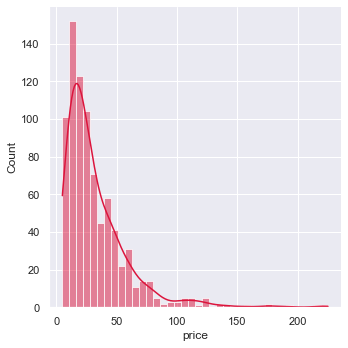

In [41]:
#sns.displot(data=ventes, x='price')
sns.displot(data=erp
             , x='price'
            ,color = 'crimson'
            #,alpha = 0.8
            #,bins = 100
            #,binwidth = 1
            ,kde = True          
            )

On constate que la majorité des vins vendus coûte moins de 50€.

Bien que certains produits se vendent à plus de 200€ (225€ étant le prix maximum), cela __ne semble pas aberrant__, mais, bien au contraire, plutôt cohérent avec le type de produit.  

<AxesSubplot:xlabel='price', ylabel='total_sales'>

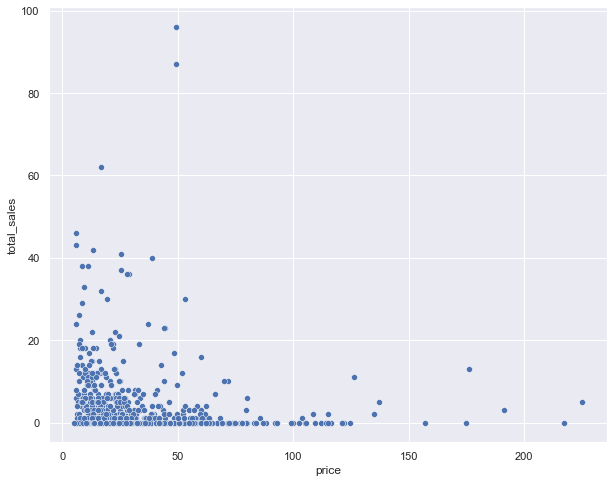

In [42]:
import matplotlib.pyplot as plt

fig, scatter= plt.subplots(figsize=(10,8))
sns.scatterplot(data=ventes
             , x='price'
             ,y ='total_sales'   
            #,color = 'crimson'
            #,alpha = 0.8
            #,bins = 100
            #,binwidth = 1
            #,kde = True          
            )

# Conclusion

Voici les problèmes qui ont été relevés:

- le fichier de la boutique en ligne a doublé les lignes;

- incohérence entre le stock indiqué (0) et le statut ('in stock') pour le produit dont le product_id est 4954;

- certaines références n'ont pas de sku (_Pierre Jean Villa Côte Rôtie Fongeant 2017_ et _Pierre Jean Villa Condrieu Jardin Suspendu 2018_)